# 1. Import th∆∞ vi·ªán v√† c√°c t√†i nguy√™n

## 1.1. Th∆∞ vi·ªán v√† gg drive

In [1]:
!pip install seaborn -q
!pip install scikit-learn -q
!pip install tensorflow -q
!pip install keras -q
!pip install -U gdown

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. T·∫£i v√† gi·∫£i n√©n c√°c b·ªô pre-trained word embeddings cho ti·∫øng Vi·ªát

ƒê·ªÉ m√¥ h√¨nh c√≥ th·ªÉ h·ªçc t·ªët h∆°n √Ω nghƒ©a v√† ng·ªØ nghƒ©a c·ªßa t·ª´, ch√∫ng ta th∆∞·ªùng s·ª≠ d·ª•ng c√°c **word embeddings** ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán tr∆∞·ªõc (pre-trained) tr√™n t·∫≠p d·ªØ li·ªáu l·ªõn. Vi·ªác n√†y gi√∫p m√¥ h√¨nh t·∫≠n d·ª•ng ƒë∆∞·ª£c tri th·ª©c ng√¥n ng·ªØ chung, tƒÉng hi·ªáu qu·∫£ ngay c·∫£ v·ªõi l∆∞·ª£ng d·ªØ li·ªáu hu·∫•n luy·ªán nh·ªè.

#### **A. fastText embedding**

T·∫£i b·ªô vector fastText cho ti·∫øng Vi·ªát:**


In [3]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.vec.gz

--2025-07-26 07:12:35--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1235219084 (1.1G) [binary/octet-stream]
Saving to: ‚Äòcc.vi.300.vec.gz‚Äô

cc.vi.300.vec.gz    100%[===================>]   1.15G   198MB/s    in 9.5s    

2025-07-26 07:12:45 (124 MB/s) - ‚Äòcc.vi.300.vec.gz‚Äô saved [1235219084/1235219084]



Gi·∫£i n√©n file vector:

In [4]:
import gzip
import shutil
with gzip.open('cc.vi.300.vec.gz', 'rb') as f_in:
    with open('cc.vi.300.vec', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

#### **B. PhoW2V embedding (Word2Vec c·ªßa VinAI)**
T·∫£i word2vec embedding theo word v√† theo syllable  (t·∫£i t·ª´ tr√™n m√°y local l√™n):

Link git repo https://github.com/datquocnguyen/PhoW2V?tab=readme-ov-file

In [5]:
!gdown --id 1EEF2xFmL9FZKY9dIwW3fAaHUwBXSRCdi -O /content/word2vec_vi_syllables_300dims.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1EEF2xFmL9FZKY9dIwW3fAaHUwBXSRCdi
From (redirected): https://drive.google.com/uc?id=1EEF2xFmL9FZKY9dIwW3fAaHUwBXSRCdi&confirm=t&uuid=b3126981-a073-4cd0-be4f-eefd12322e8e
To: /content/word2vec_vi_syllables_300dims.zip
100% 1.42G/1.42G [00:16<00:00, 84.5MB/s]


In [6]:
from zipfile import ZipFile

zipf = ZipFile('word2vec_vi_syllables_300dims.zip')
zipf.extractall()

In [7]:
!gdown --id 1e_zLgwkt1LmmC2rY7DOaPgjwwC-p3h0F -O /content/word2vec_vi_words_300dims.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1e_zLgwkt1LmmC2rY7DOaPgjwwC-p3h0F
From (redirected): https://drive.google.com/uc?id=1e_zLgwkt1LmmC2rY7DOaPgjwwC-p3h0F&confirm=t&uuid=8f746d7f-3a4e-4cef-9211-32e94906bd67
To: /content/word2vec_vi_words_300dims.zip
100% 2.32G/2.32G [00:25<00:00, 91.0MB/s]


In [8]:
zipf = ZipFile('word2vec_vi_words_300dims.zip')
zipf.extractall()

## 1.3. Config.yml


In [9]:
import yaml

path = "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/config.yaml"

with open(path, 'r', encoding='utf-8') as f:
    config = yaml.safe_load(f)



In [10]:
import os
import random
import numpy as np
import tensorflow as tf

def set_seed(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


# 2. Dataset


In [11]:
import yaml
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def vi_preprocess(text):
    # Lowercase
    text = text.lower()
    # Lo·∫°i b·ªè k√Ω t·ª± kh√¥ng ph·∫£i ch·ªØ/s·ªë
    text = re.sub(r"[^\w\s]", " ", text)
    # Lo·∫°i b·ªè s·ªë
    # text = re.sub(r"\d+", " ", text)
    # Chu·∫©n h√≥a kho·∫£ng tr·∫Øng
    text = re.sub(r"\s+", " ", text).strip()
    return text

class DataLoader:
    def __init__(self, config_path, mode='train', embedding_type=None):

        # Load config t·ª´ file
        with open(config_path, 'r', encoding='utf-8') as f:
            self.config = yaml.safe_load(f)

        self.mode = mode

        # L·∫•y ƒë∆∞·ªùng d·∫´n file theo mode (train/test/val/warmup)
        paths = self.config['paths']
        if mode not in paths:
            raise ValueError(f"Mode '{mode}' kh√¥ng c√≥ trong config.")
        self.data_path = paths[mode]
        # Thay th·∫ø {paths.base} n·∫øu c·∫ßn
        base = paths.get("base", "")
        if "{paths.base}" in self.data_path:
            self.data_path = self.data_path.replace("{paths.base}", base)

        # C√°c tham s·ªë ti·ªÅn x·ª≠ l√Ω
        bilstm_conf = self.config['preprocessing']['bilstm']
        self.max_num_words = bilstm_conf.get('max_features', 2500)
        self.max_seq_length = bilstm_conf.get('maxlen', 500)
        self.clean_text = bilstm_conf.get('clean_text', True)

        self.tokenizer = Tokenizer(num_words=self.max_num_words, oov_token="<OOV>")
        self.texts, self.labels = self.load_data()
        self.prepare_data()

        # X·ª≠ l√Ω embedding ngo√†i n·∫øu ƒë∆∞·ª£c y√™u c·∫ßu
        self.embedding_matrix = None
        if embedding_type is not None:
            self.embedding_matrix = self.get_embedding_matrix(embedding_type)

    def load_data(self):
        df = pd.read_csv(self.data_path)
        texts = df['post_message'].astype(str).tolist()
        if self.clean_text:
            texts = [vi_preprocess(t) for t in texts]
        if 'label' in df.columns:
            labels = df['label'].astype(int).values
        else:
            labels = None
        return texts, labels

    def prepare_data(self):
        # Fit tokenizer tr√™n to√†n b·ªô texts (th∆∞·ªùng ch·ªâ fit tr√™n train)
        self.tokenizer.fit_on_texts(self.texts)
        sequences = self.tokenizer.texts_to_sequences(self.texts)
        self.padded_sequences = pad_sequences(
            sequences, maxlen=self.max_seq_length, padding='post', truncating='post'
        )

    def get_data(self):
        print(f"Load dataset: {self.mode}")
        return self.padded_sequences, self.labels

    def get_tokenizer(self):
        return self.tokenizer

    def get_config(self):
        return self.config

    def get_embedding_matrix(self, embedding_type=None, cache_dir='.', force_rebuild=False):
        """
        Tr·∫£ v·ªÅ embedding matrix: ∆∞u ti√™n load t·ª´ cache .npy (n·∫øu c√≥),
        n·∫øu ch∆∞a c√≥ s·∫Ω t·ª± ƒë·ªông build t·ª´ file text embedding, l∆∞u v√†o cache .npy.
        N·∫øu embedding_type=None s·∫Ω tr·∫£ v·ªÅ random matrix.
        """
        embed_dim = getattr(self, 'embed_dim', 300)
        num_words = min(getattr(self, 'max_num_words', 2500), len(self.tokenizer.word_index) + 1)

        if embedding_type is None:
            print("[DataLoader] Kh√¥ng d√πng embedding ngo√†i, t·∫°o random embedding_matrix.")
            return np.random.uniform(-0.05, 0.05, (self.max_num_words, embed_dim))

        # ƒê·∫∑t t√™n cache theo tokenizer + embedding_type ƒë·ªÉ tr√°nh nh·∫ßm l·∫´n
        cache_file = os.path.join(
            cache_dir,
            f"embedding_matrix_{embedding_type}_{num_words}_{embed_dim}.npy"
        )
        if os.path.exists(cache_file) and not force_rebuild:
            print(f"[DataLoader] Loading cached embedding matrix: {cache_file}")
            return np.load(cache_file)

        # L·∫•y embedding_path t·ª´ config ho·∫∑c truy·ªÅn v√†o class khi init
        try:
            embedding_path = self.embedding_path if hasattr(self, 'embedding_path') else \
                self.config['paths']['embeddings'][embedding_type]
        except Exception as e:
            raise ValueError(f"Kh√¥ng t√¨m th·∫•y ƒë∆∞·ªùng d·∫´n embedding {embedding_type}: {e}")

        print(f"[DataLoader] Building embedding matrix t·ª´ {embedding_path}")
        vocab = set(self.tokenizer.word_index.keys())
        embedding_matrix = np.random.uniform(-0.05, 0.05, (self.max_num_words, embed_dim))
        with open(embedding_path, "r", encoding="utf-8", errors="ignore") as f:
            first_line = f.readline()
            try:
                int(first_line.split()[1])
            except:
                f.seek(0)
            for line in f:
                values = line.rstrip().split()
                word = values[0]
                if word in vocab:
                    i = self.tokenizer.word_index[word]
                    if i >= num_words:
                        continue
                    try:
                        vec = np.asarray(values[1:], dtype='float32')
                    except Exception as e:
                        print(f"B·ªè qua t·ª´ {word} do l·ªói: {e}")
                        continue
                    if vec.shape[0] == embed_dim:
                        embedding_matrix[i] = vec

        os.makedirs(os.path.dirname(cache_file), exist_ok=True)
        np.save(cache_file, embedding_matrix)

        print(f"[DataLoader] ƒê√£ l∆∞u embedding matrix cache t·∫°i {cache_file}")
        return embedding_matrix





# 3. BiLSTM Model

In [12]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

class BiLSTMModel:
    def __init__(
        self,
        vocab_size,
        embedding_dim=128,
        max_seq_length=100,
        lstm_units=64,
        dropout_rate=0.2,
        output_dim=1,
        output_activation="sigmoid",
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    ):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.max_seq_length = max_seq_length
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.output_dim = output_dim
        self.output_activation = output_activation

                # --- CH·ªåN LOSS THEO THAM S·ªê ---
        if str(loss).lower() == "focal":
            self.loss = focal_loss_fixed
            print("=> S·ª≠ d·ª•ng Focal Loss")
        else:
            self.loss = loss  # "binary_crossentropy" ho·∫∑c t√™n loss kh√°c
            print("=> S·ª≠ d·ª•ng loss:", loss)

        self.optimizer = optimizer
        self.metrics = [
            "accuracy",
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
        self.model = self.build_model()
        self.model.compile(
            loss=self.loss,
            optimizer=self.optimizer,
            metrics=self.metrics
        )

    def build_model(self):
        model = Sequential()
        model.add(Embedding(self.vocab_size, self.embedding_dim, input_length=self.max_seq_length))
        model.add(Bidirectional(LSTM(self.lstm_units, return_sequences=False)))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(self.output_dim, activation=self.output_activation))
        return model

    def summary(self):
        return self.model.summary()

    def save(self, filepath):
        self.model.save(filepath)

    def load(self, filepath):
        self.model = load_model(filepath)

In [13]:
from keras.saving import register_keras_serializable
import tensorflow as tf
from keras import backend as K

@register_keras_serializable(package="custom", name="focal_loss_fixed")
def focal_loss_fixed(y_true, y_pred):
    gamma = 2.0
    alpha = 0.5
    y_true = tf.cast(y_true, tf.float32)
    epsilon = K.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
    loss = -alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt)
    return tf.reduce_mean(loss)


# 4. Class Trainer

In [14]:
import csv
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, CSVLogger
import os

class Trainer:
    def __init__(
        self,
        model,
        X_train,
        y_train,
        X_val=None,
        y_val=None,
        batch_size=32,
        epochs=10,
        callbacks=None,
        validation_split=0.2,
        use_validation_data=True,
        verbose=1,
        checkpoint_path=None,
        log_path=None,
        class_weights=None,
    ):
        self.model = model  # L√† model Keras (v√≠ d·ª• model_obj.model)
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.batch_size = batch_size
        self.epochs = epochs
        self.validation_split = validation_split
        self.use_validation_data = use_validation_data
        self.verbose = verbose
        self.checkpoint_path = checkpoint_path
        self.log_path = log_path
        self.callbacks = callbacks if callbacks is not None else self.default_callbacks()
        self.class_weights = class_weights

        # Kh·ªüi t·∫°o callbacks
        if self.checkpoint_path is not None:
            # L∆∞u model theo chu·∫©n .keras, monitor val_loss
            self.callbacks.append(
                ModelCheckpoint(
                    filepath=self.checkpoint_path,
                    monitor='val_loss',
                    save_best_only=True,
                    verbose=1,
                )
            )
        # T·ª± build model n·∫øu ch∆∞a build ƒë·ªÉ tr√°nh param=0 khi summary
        self._auto_build()

    def _auto_build(self):
        # N·∫øu model ch∆∞a ƒë∆∞·ª£c build (layers param=0), h√£y build tr∆∞·ªõc v·ªõi shape ph√π h·ª£p
        # C√°ch n√†y ho·∫°t ƒë·ªông n·∫øu b·∫°n bi·∫øt shape input (vd: max_seq_length)
        if hasattr(self.model, 'built') and not self.model.built:
            # L·∫•y shape t·ª´ layer ƒë·∫ßu ti√™n n·∫øu c√≥, ho·∫∑c ƒëo√°n theo chu·∫©n NLP
            for layer in self.model.layers:
                if hasattr(layer, 'input_length'):
                    seq_len = getattr(layer, 'input_length', 100)
                    self.model.build(input_shape=(None, seq_len))
                    break
            # Ho·∫∑c d√πng c·ª©ng n·∫øu b·∫°n bi·∫øt ch·∫Øc chi·ªÅu d√†i:
            # self.model.build(input_shape=(None, 500))
        # In summary ƒë·ªÉ ki·ªÉm tra, c√≥ th·ªÉ comment n·∫øu kh√¥ng c·∫ßn
        self.model.summary()

    def default_callbacks(self):
        callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]

        if self.log_path:
            log_dir = os.path.dirname(self.log_path)
            if log_dir and not os.path.exists(log_dir):
                os.makedirs(log_dir)

            # CSVLogger: ghi log training v√†o file CSV
            callbacks.append(CSVLogger(self.log_path, append=False))

            # TensorBoard: log cho TensorBoard
            tensorboard_dir = os.path.join(log_dir, "tensorboard")
            callbacks.append(TensorBoard(log_dir=tensorboard_dir, histogram_freq=1))

        return callbacks

    def train(self):
        if self.use_validation_data and self.X_val is not None and self.y_val is not None:
            history = self.model.fit(
                self.X_train, self.y_train,
                validation_data=(self.X_val, self.y_val),
                batch_size=self.batch_size,
                epochs=self.epochs,
                callbacks=self.callbacks,
                verbose=self.verbose,
                class_weight=self.class_weights
            )
        else:
            history = self.model.fit(
                self.X_train, self.y_train,
                validation_split=self.validation_split,
                batch_size=self.batch_size,
                epochs=self.epochs,
                callbacks=self.callbacks,
                verbose=self.verbose,
                class_weight=self.class_weights
            )
        return history


In [15]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from tensorflow.keras.callbacks import Callback
import numpy as np

class BinaryMetricsCallback(Callback):
    def __init__(self, X_val, y_val, threshold=0.5):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        # D·ª± ƒëo√°n x√°c su·∫•t
        y_pred_prob = self.model.predict(self.X_val)

        # Nh√£n d·ª± ƒëo√°n 0/1 d·ª±a theo ng∆∞·ª°ng threshold
        y_pred = (y_pred_prob > self.threshold).astype(int).reshape(-1)

        # N·∫øu y_val l√† one-hot vector th√¨ chuy·ªÉn th√†nh nh√£n
        y_true = self.y_val if len(self.y_val.shape) == 1 else np.argmax(self.y_val, axis=1)

        # T√≠nh c√°c ch·ªâ s·ªë
        f1 = f1_score(y_true, y_pred, average='binary')
        recall = recall_score(y_true, y_pred, average='binary')
        precision = precision_score(y_true, y_pred, average='binary')
        try:
            auc = roc_auc_score(y_true, y_pred_prob)
        except ValueError:
            auc = float('nan')  # x·∫£y ra khi ch·ªâ c√≥ 1 l·ªõp trong batch val

        # In k·∫øt qu·∫£
        print(f" ‚Äî val_precision: {precision:.4f} ‚Äî val_recall: {recall:.4f} ‚Äî val_f1: {f1:.4f} ‚Äî val_auc: {auc:.4f}")

        # Ghi v√†o logs ƒë·ªÉ c√≥ th·ªÉ l∆∞u ho·∫∑c d√πng v·ªõi TensorBoard/CSVLogger
        if logs is not None:
            logs['val_precision'] = precision
            logs['val_recall'] = recall
            logs['val_f1'] = f1
            logs['val_auc'] = auc

# 5. Class Evaluator

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
import seaborn as sns

class Evaluator:
    def __init__(self, model):
        self.model = model  # L√† model Keras (.model c·ªßa BiLSTMModel)

    def evaluate(self, X_test, y_test, batch_size=32):
        results = self.model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
        metric_names = self.model.metrics_names

        for name, value in zip(metric_names, results):
            print(f"{name}: {value:.4f}")

        return dict(zip(metric_names, results))


    def classification_report(self, X_test, y_test, threshold=0.5):
        y_pred_prob = self.model.predict(X_test)
        y_pred = (y_pred_prob > threshold).astype(int)

        print(f"\nüìã Classification Report (threshold = {threshold}):")
        print(classification_report(y_test, y_pred, digits=4))

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"\nüîç Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f}")


    def plot_history(self, history):
        # Plot loss
        plt.figure()
        plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Plot accuracy
        if 'accuracy' in history.history:
            plt.figure()
            plt.plot(history.history['accuracy'], label='Train Acc')
            if 'val_accuracy' in history.history:
                plt.plot(history.history['val_accuracy'], label='Val Acc')
            plt.title('Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()

    def confusion_matrix(self, X_test, y_test, threshold=0.5):
        y_pred_prob = self.model.predict(X_test)

        y_pred = (y_pred_prob > threshold).astype(int)

        cm = confusion_matrix(y_test, y_pred)

        print("\nüìä Confusion Matrix:")
        print(cm)

        # Tr·ª±c quan h√≥a
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (threshold={threshold})')
        plt.show()


    def predict_single(self, input_sequence):
        # input_sequence ƒë√£ pad s·∫µn
        y_prob = self.model.predict(input_sequence)
        return int(y_prob[0][0] > 0.5)

    def plot_roc_auc(self, X_test, y_test):
        y_score = self.model.predict(X_test)

        # Binary classification
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()



# 6. Run pipeline

In [17]:
%%writefile "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/config_bilstm_fasttext.yaml"

mode: train
seed: 123

paths:
  train: "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/reintel_dataset/train.csv"
  test: "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/reintel_dataset/test.csv"
  val: "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/reintel_dataset/val.csv"
  warmup: "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/reintel_dataset/warmup.csv"
  embeddings:
    fasttext: "cc.vi.300.vec" #fasttext
    word2vec: "word2vec_vi_syllables_300dims.txt"

preprocessing:
  bilstm:
    max_features: 2500
    maxlen: 500
    embed_size: 300
    clean_text: true
  phobert:
    max_sequence_length: 256
    clean_text: true

split:
  valid_size: 0.33
  random_state: 42  # d√πng chung cho c·∫£ seed v√† train_test_split

models:
  bilstm:
    embedding_dim: 300
    max_seq_length: 500
    lstm_units: 128
    dropout_rate: 0.3
    output_dim: 1
    output_activation: "sigmoid"
    loss: "focal"  # ho·∫∑c "binary_crossentropy"
    optimizer: "adam"
    embedding_type: "fasttext" #
    metrics: ["accuracy", "precision", "recall", "auc"]
    use_f1_callback: true  # ƒë·ªÉ d√πng BinaryMetricsCallback()

training:
  batch_size: 32
  epochs: 10
  checkpoint_path: "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/checkpoints/fasttext_model.keras"
  log_path: "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/logs/training_log_fasttext.csv"
  early_stopping:
    patience: 3
  device: auto


Writing /content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/config_bilstm_fasttext.yaml


[DataLoader] Building embedding matrix t·ª´ cc.vi.300.vec
[DataLoader] ƒê√£ l∆∞u embedding matrix cache t·∫°i ./embedding_matrix_fasttext_2500_300.npy
Load dataset: train
[DataLoader] Loading cached embedding matrix: ./embedding_matrix_fasttext_2500_300.npy
Load dataset: val
Load dataset: test
=> S·ª≠ d·ª•ng Focal Loss


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)           ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

{0: np.float64(0.6012518915944421), 1: np.float64(2.9690896739130435)}


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)           ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 34ms/step
 ‚Äî val_precision: 0.3750 ‚Äî val_recall: 0.0366 ‚Äî val_f1: 0.0667 ‚Äî val_auc: 0.5879

Epoch 1: val_loss improved from inf to 0.10236, saving model to /content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/checkpoints/best_model.keras
274/274 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 67ms/step - accuracy: 0.8446 - auc: 0.7331 - loss: 0.0512 - precision: 0.5001 - recall: 0.1998 - val_accuracy: 0.8272 - val_auc: 0.5879 - val_loss: 0.1024 - val_precision: 0.3750 - val_recall: 0.0366 - val_f1: 0.0667
Epoch 2/10
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
 ‚Äî val_precision: 0.3333 ‚Äî val_recall: 0.0366 ‚Äî val_f1: 0.0659 ‚Äî val_auc: 0.5264

Epoch 2: val_loss did not improve from 0.10236
274/274 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 68ms/step - accuracy: 0.9396 - auc: 0.9638 - loss: 0.0225 - precisio

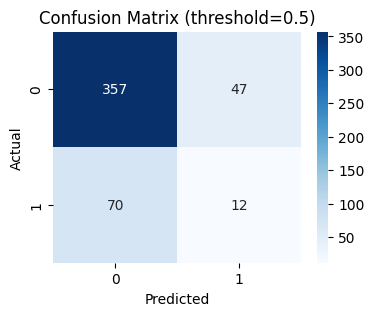

16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step


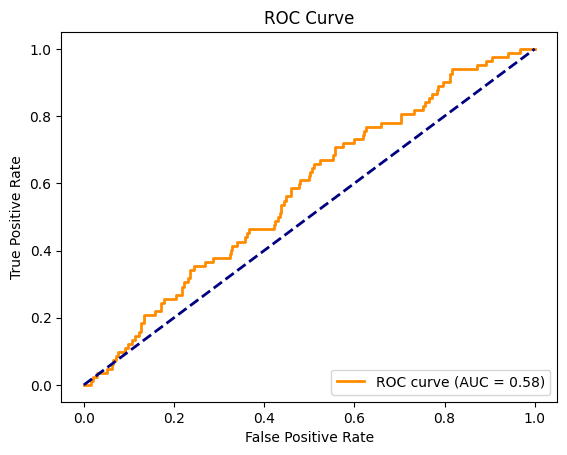

In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
import builtins


zip = builtins.zip

# ƒê∆∞·ªùng d·∫´n config.yaml
config_path = "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/config.yaml"
with open(config_path, 'r', encoding='utf-8') as f:
    config = yaml.safe_load(f)
set_seed(config["seed"])


# 1. Load data train v√† validation
# Load t·∫≠p train (√°p d·ª•ng preprocessing n·∫øu b·∫≠t clean_text trong config)
train_loader = DataLoader(config_path, mode="train", embedding_type=config['models']['bilstm']['embedding_type'])  # "fasttext" ho·∫∑c "word2vec", ho·∫∑c None
X_train, y_train = train_loader.get_data()
tokenizer = train_loader.get_tokenizer()

embedding_matrix = train_loader.get_embedding_matrix(
    embedding_type= config['models']['bilstm']['embedding_type'],  # ho·∫∑c 'word2vec', ho·∫∑c None
)

# Load t·∫≠p validation (ph·∫£i d√πng l·∫°i tokenizer ƒë√£ fit tr√™n train!)
val_loader = DataLoader(config_path, mode="val")
val_loader.tokenizer = tokenizer
val_loader.prepare_data()  # Re-tokenize + pad v·ªõi tokenizer ƒë√£ fit t·ª´ train
X_val, y_val = val_loader.get_data()

#Load test set
test_loader = DataLoader(config_path, mode="test")
test_loader.tokenizer = tokenizer
test_loader.prepare_data()
X_test, y_test = test_loader.get_data()


# 2. Kh·ªüi t·∫°o model v·ªõi tham s·ªë t·ª´ config
bilstm_conf = config['models']['bilstm']
pre_conf = config['preprocessing']['bilstm']

model_obj = BiLSTMModel(
    vocab_size=len(tokenizer.word_index) + 1,
    embedding_dim=pre_conf.get("embed_size", 300),
    max_seq_length=pre_conf.get("maxlen", 500),
    lstm_units=bilstm_conf.get("lstm_units", 128),
    dropout_rate=bilstm_conf.get("dropout_rate", 0.3),
    output_dim=bilstm_conf.get("output_dim", 1),
    output_activation=bilstm_conf.get("output_activation", "sigmoid"),
    loss=bilstm_conf.get("loss", "binary_crossentropy"),
    optimizer=bilstm_conf.get("optimizer", "adam")
)

model_obj.summary()

# 3. Kh·ªüi t·∫°o Trainer v√† train
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

binary_metrics_cb = BinaryMetricsCallback(X_val, y_val)
trainer = Trainer(
    model=model_obj.model,
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    batch_size=32,
    epochs=10,
    checkpoint_path=config['training']['checkpoint_path'],
    log_path=config['training']['log_path'],
    callbacks=[binary_metrics_cb],
    class_weights = class_weights
)
history = trainer.train()
model_obj.save("best_model.keras")

# 4. ƒê√°nh gi√° & tr·ª±c quan h√≥a

evaluator = Evaluator(model_obj.model)

evaluator.evaluate(X_test, y_test)
evaluator.classification_report(X_test, y_test)
evaluator.confusion_matrix(X_test, y_test)
evaluator.plot_roc_auc(X_test, y_test)


loss: 0.0961
compile_metrics: 0.8189
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 32ms/step

üìã Classification Report (threshold = 0.5):
              precision    recall  f1-score   support

           0     0.8319    0.9802    0.9000       404
           1     0.2000    0.0244    0.0435        82

    accuracy                         0.8189       486
   macro avg     0.5160    0.5023    0.4717       486
weighted avg     0.7253    0.8189    0.7555       486


üîç Precision: 0.2000 | Recall: 0.0244 | F1-score: 0.0435
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step

üìä Confusion Matrix:
[[396   8]
 [ 80   2]]


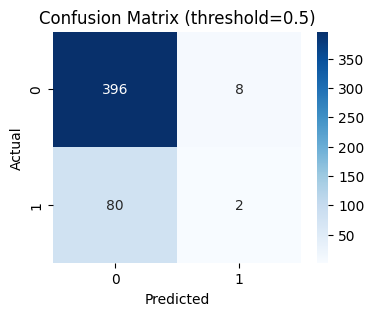

16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step


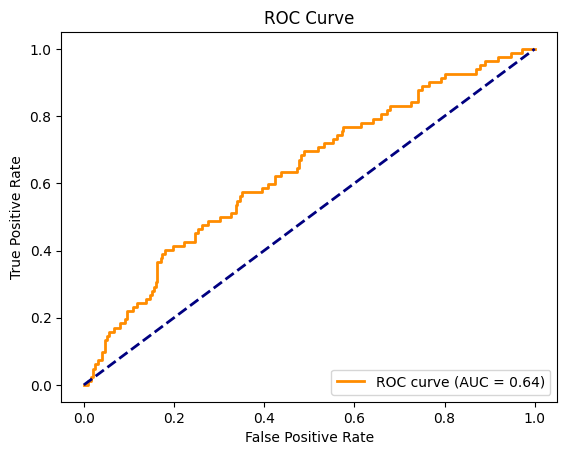

In [19]:
from keras.models import load_model

# Load l·∫°i m√¥ h√¨nh
loaded_model = load_model(
    "/content/drive/MyDrive/1.PROJECTS/[TeamPe][BIT][BGRA2025]/NLP/Code/checkpoints/best_model.keras",
    custom_objects={"focal_loss_fixed": focal_loss_fixed},
    compile=True)

# T·∫°o evaluator m·ªõi
evaluator = Evaluator(loaded_model)

evaluator.evaluate(X_test, y_test)
evaluator.classification_report(X_test, y_test)
evaluator.confusion_matrix(X_test, y_test)
evaluator.plot_roc_auc(X_test, y_test)

